## Table of Content:

1. Importing the libraries and dataset
2. Data Preprocessing and Feature Engineering
3. Building the RNN
4. Making the predictions and visualising the results



## 1. Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import json
import pickle
import joblib

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential

# import pad sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Embedding



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
data=pd.read_csv("Resources/prepared_data1.csv")
data.fillna('',inplace=True)
data.head()


,Body,Label
0,save life insurance spend life quote saving en...,1
1,fight risk cancer http www adclick w p cfm pk ...,1
2,fight risk cancer http www adclick w p cfm pk ...,1
3,adult club offer free membership instant acces...,1
4,thought might like slim guaranteed lose lb day...,1


## 2. Data Preprocessing and Feature Engineering

In [17]:
texts=list(data['Body'])
labels=list(data['Label'].astype(bool))


print(len(texts),len(labels))

5293 5293


In [18]:
print("No. of 0 labels:",labels.count(0))
print("No. of 1 labels:",labels.count(1))

No. of 0 labels: 3915
No. of 1 labels: 1378


In [20]:
# Maximal length of the text
maxlen=100

# Maximal number of words to be used
max_words=10000

# instantiate tokenizer
tokenizer = Tokenizer()

# fit tokenizer on text
tokenizer.fit_on_texts(texts)

# create sequences
sequences = tokenizer.texts_to_sequences(texts)

# create word index
word_index = tokenizer.word_index

# create reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


print('Found %s unique tokens.' % len(word_index))


Found 61499 unique tokens.


In [21]:

# pad sequences
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')


# split data into training and testing
split = int(0.8 * len(texts))

train_sequences = padded[:split]
test_sequences = padded[split:]

train_labels = np.asarray(labels[:split])
test_labels = np.asarray(labels[split:])



print('Shape of training data tensor:', train_sequences.shape)
print('Shape of training label tensor:', train_labels.shape)
print('Shape of testing data tensor:', test_sequences.shape)
print('Shape of testing label tensor:', test_labels.shape)



Shape of training data tensor: (4234, 100)
Shape of training label tensor: (4234,)
Shape of testing data tensor: (1059, 100)
Shape of testing label tensor: (1059,)


## 3. Building the RNN

In [25]:

# parameters

vocab_size = len(word_index) + 1
embedding_dim = 32

# create model

# instantiate model
model = Sequential()


# add embedding layer
model.add(Embedding(vocab_size, embedding_dim))

# add LSTM layer
model.add(LSTM(32))

# add dense layer
model.add(Dense(1, activation='sigmoid'))

# model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          1968000   
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,976,353
Trainable params: 1,976,353
Non-trainable params: 0
_________________________________________________________________


In [26]:

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
# fit model

history = model.fit(train_sequences, train_labels,
        epochs=10, 
        validation_data=(test_sequences, test_labels), 
        verbose=2,
        batch_size=32
        
        )

Epoch 1/10
133/133 - 8s - loss: 0.4212 - accuracy: 0.8125 - val_loss: 0.4585 - val_accuracy: 0.8414 - 8s/epoch - 59ms/step
Epoch 2/10
133/133 - 6s - loss: 0.1760 - accuracy: 0.9570 - val_loss: 0.3799 - val_accuracy: 0.8754 - 6s/epoch - 44ms/step
Epoch 3/10
133/133 - 6s - loss: 0.1734 - accuracy: 0.9575 - val_loss: 0.3889 - val_accuracy: 0.8857 - 6s/epoch - 43ms/step
Epoch 4/10
133/133 - 6s - loss: 0.1399 - accuracy: 0.9660 - val_loss: 0.4878 - val_accuracy: 0.8517 - 6s/epoch - 44ms/step
Epoch 5/10
133/133 - 6s - loss: 0.0979 - accuracy: 0.9771 - val_loss: 0.3855 - val_accuracy: 0.8744 - 6s/epoch - 44ms/step
Epoch 6/10
133/133 - 6s - loss: 0.0858 - accuracy: 0.9813 - val_loss: 0.2569 - val_accuracy: 0.9169 - 6s/epoch - 45ms/step
Epoch 7/10
133/133 - 6s - loss: 0.0366 - accuracy: 0.9936 - val_loss: 0.4567 - val_accuracy: 0.8678 - 6s/epoch - 45ms/step
Epoch 8/10
133/133 - 6s - loss: 0.0236 - accuracy: 0.9965 - val_loss: 0.5400 - val_accuracy: 0.8574 - 6s/epoch - 44ms/step
Epoch 9/10
133/1

## 4. Making the predictions and visualising the results

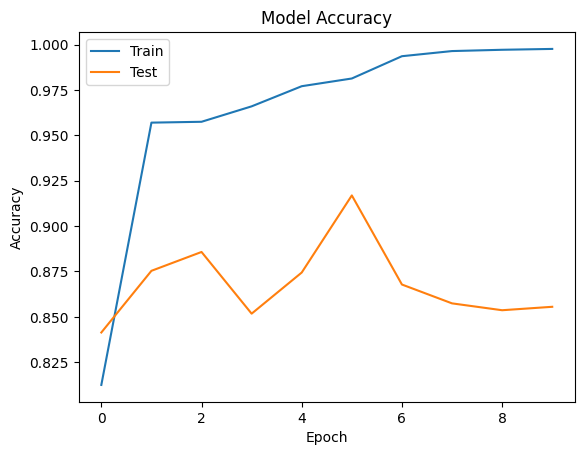

In [28]:


# plot training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





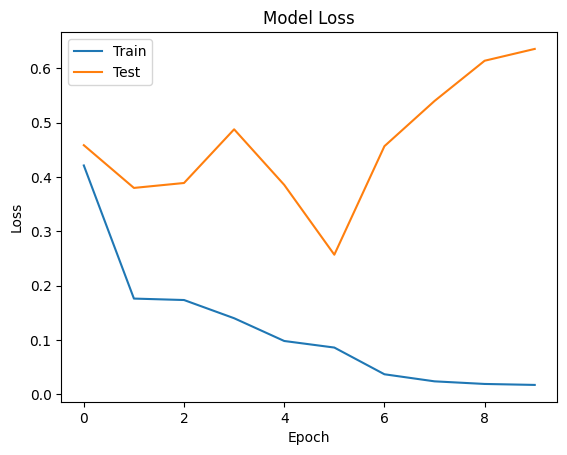

In [29]:
# plot training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [30]:

# evaluate model
loss, accuracy = model.evaluate(test_sequences, test_labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

# make predictions
predictions = model.predict(test_sequences)

# print predictions
print(predictions[:10])

# print actual values
print(test_labels[:10])



Accuracy: 85.552406
34/34 [==============================] - 1s 12ms/step
[[0.00530069]
 [0.00385   ]
 [0.99621433]
 [0.00279933]
 [0.00272117]
 [0.9962149 ]
 [0.0027982 ]
 [0.00298221]
 [0.00356902]
 [0.00970907]]
[False False False False False False False False False False]


In [31]:

# print confusion matrix
cm = confusion_matrix(test_labels, predictions.round())
print(cm)


[[906 153]
 [  0   0]]


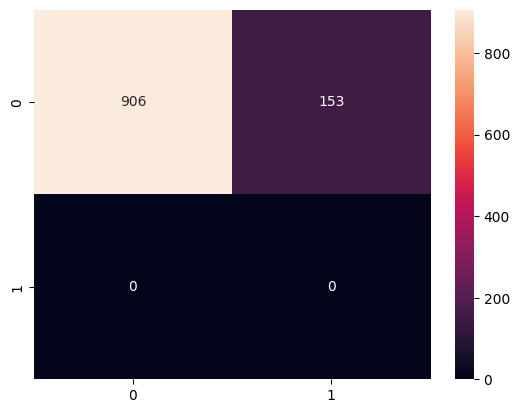

In [32]:
# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [33]:
# print classification report
print(classification_report(test_labels, predictions.round()))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1059
         1.0       0.00      0.00      0.00         0

    accuracy                           0.86      1059
   macro avg       0.50      0.43      0.46      1059
weighted avg       1.00      0.86      0.92      1059



/home/nitish/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nitish/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nitish/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Saving the model

model.save("Resources/RNN_model.h5")

# Saving the tokenizer

with open('Resources/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the word index

with open('Resources/word_index.json', 'w') as fp:
    json.dump(word_index, fp)

# Saving the reverse word index

with open('Resources/reverse_word_index.json', 'w') as fp:
    json.dump(reverse_word_index, fp)
